# Project: Recognizing Traffic Signs Using Deep Learning
### Scope: Support Vector Machine (SVM) Investigation on tunning hyper-parameters
##### Author: Ashish Panchal (epababl03.ashishp@iima.ac.in)

In [1]:
# Import Libraries
import numpy as np
import cv2
import sys
import os
from os import path
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import ShuffleSplit

# Local python modules
sys.path.insert(0, os.path.abspath('../src/util'))
sys.path.insert(1, os.path.abspath('../src/model'))
sys.path.insert(2, os.path.abspath('../src/data'))
from util import Util
from load_save import LoadSave
from datapreprocessor import preprocess

# GLOBAL PARAM
CHART_WIDTH = 12
CHART_HEIGHT = 8

In [2]:
#Load stored data

#No. of classes
%store -r n_classes

# class labels
%store -r signs

#Final preprocessed Training Dataset
%store -r X_train_preprocessed
%store -r y_train_final

#Final preprocessed Test Dataset
%store -r X_test_preprocessed
%store -r y_test


#Final preprocessed Validation Dataset
%store -r X_valid_preprocessed 
%store -r y_valid

In [3]:
#print(sorted(SCORERS.keys()))
def decimal_str(x: float, decimals: int = 10) -> str:
    return format(x, f".{decimals}f").lstrip().rstrip('0')

#### Verify pre-processed Training, Test, and Validation datasets

In [4]:
print(X_train_preprocessed.shape)
print(y_train_final.shape)
print(X_valid_preprocessed.shape)
print(y_valid.shape)

(39239, 32, 32, 1)
(39239,)
(4410, 32, 32, 1)
(4410,)


## 4.1.1 Hyper-parameters of SVM

#### 4.1.1.1 Choosing Right values of Gamma for rbf Kernel

In [5]:
# Set the parameters by cross-validation
param_range = np.logspace(-4, 1, 4)
a= []
for gama_val in param_range:
    a.append(decimal_str(gama_val))
print('Gamma Range: ',a)

# Number of training examples
n_train = X_train_preprocessed.shape[0]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_final))

print('Complete the basic data summary as below:')
print("Number of training examples: ", n_train)
print("Number of classes =", n_classes)

Gamma Range:  ['0.0001', '0.0046415888', '0.215443469', '10.']
Complete the basic data summary as below:
Number of training examples:  39239
Number of classes = 43


#### We will use Cross Validation Curve form scikit libaray

In [6]:
gamma_train_scores_v3 = '../data/processed/svm/train_scores_v3.npy'
gamma_test_scores_v3 = '../data/processed/svm/train_scores_v3.npy'

if path.exists(gamma_train_scores_v3) & path.exists(gamma_test_scores_v3):
    print('Both, traning and test validation curve data exist.')

Both, traning and test validation curve data exist.


In [7]:
X_train = X_train_preprocessed.reshape((len(X_train_preprocessed)),-1)

if not (path.exists(gamma_test_scores_v3) & path.exists(gamma_train_scores_v3)):
    train_scores, test_scores = validation_curve(SVC(kernel="rbf"), X_train, y_train_final, 
                                                 param_name="gamma", param_range=param_range,scoring="accuracy", 
                                                 n_jobs=10, cv=5, verbose=3)

In [7]:
## Save scroes into file object
np.save('../data/processed/svm/train_scores_v3', train_scores)
np.save('../data/processed/svm/test_scores_v3', test_scores)

### Plot Validation curve

[[0.41174222 0.40393743 0.3872129  0.38418655 0.39602446]
 [0.9262846  0.92704915 0.9257749  0.93297442 0.93705403]
 [0.99993629 0.99993629 0.99987257 1.         1.        ]
 [1.         1.         1.         1.         1.        ]]
Gamma: 0.0001 Training scores: 0.41174221910738745 Validation scores: 0.34492864424057085
Gamma: 0.0046415888 Training scores: 0.9262846038673506 Validation scores: 0.7024719673802242
Gamma: 0.215443469 Training scores: 0.9999362874709311 Validation scores: 0.09645769622833843
Gamma: 10. Training scores: 1.0 Validation scores: 0.05122324159021407


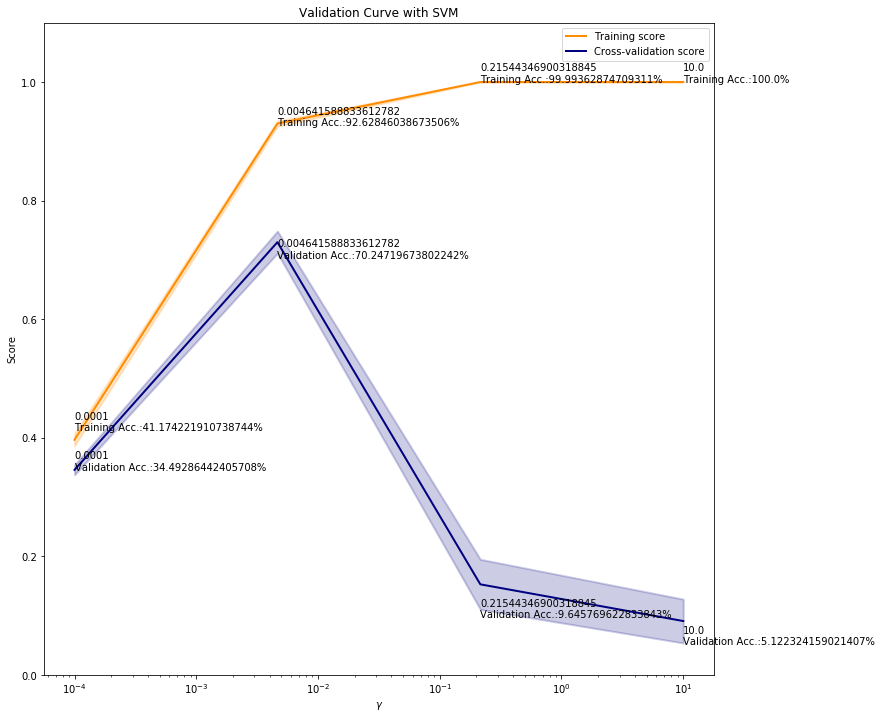

In [8]:
train_scores = np.load('../data/processed/svm/train_scores_v3.npy') 
test_scores = np.load('../data/processed/svm/test_scores_v3.npy')
print(train_scores)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


fig = plt.figure(figsize=(CHART_WIDTH, CHART_WIDTH))
ax = fig.add_subplot(111)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
for i,j,k in zip(param_range,train_scores, test_scores):
    print('Gamma:',decimal_str(i), 'Training scores:',j[0], 'Validation scores:',k[0])
    tlabel = str(i)+'\nTraining Acc.:'+str((j[0]*100))+'%'
    ax.annotate(tlabel,xy=(i,j[0]))
    vlabel = str(i)+'\nValidation Acc.:'+str((k[0]*100))+'%'
    ax.annotate(vlabel,xy=(i,k[0]))
plt.savefig('../plots/classifier/svm/Gamma_values_bigger_data_v3.png')
plt.show()

Above plot shows that, training scores and validation scores of an SVM for different values of the kernel parameter gamma($\gamma$) we can conclude following:

1. For very low values of gamma($\gamma$), both the <u>training score and the validation score are low</u>. This is called <mark>__underfitting__</mark>.

2. Medium values of gamma($\gamma$) will result in high values for both scores, i.e. the classifier is performing fairly well. 

3. If gamma($\gamma$) is too high, the classifier will <mark>__overfit__</mark>, which means that the training score is good but the validation score is poor.

#### 4.1.2. Choosing Right values of Regularization rbf Kernel

In [13]:
X_train = X_train_preprocessed.reshape((len(X_train_preprocessed)),-1)
C_s = [1, 10, 100]
scores = list()
scores_std = list()
svc = SVC(kernel="rbf")
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X_train, y_train_final, n_jobs=10, cv=5)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

np.save('../data/processed/svm/reg_scores_v3',scores)
np.save('../data/processed/svm/reg_scores_std_v3',scores_std) 

[0.73745508 0.76869962 0.76918386]


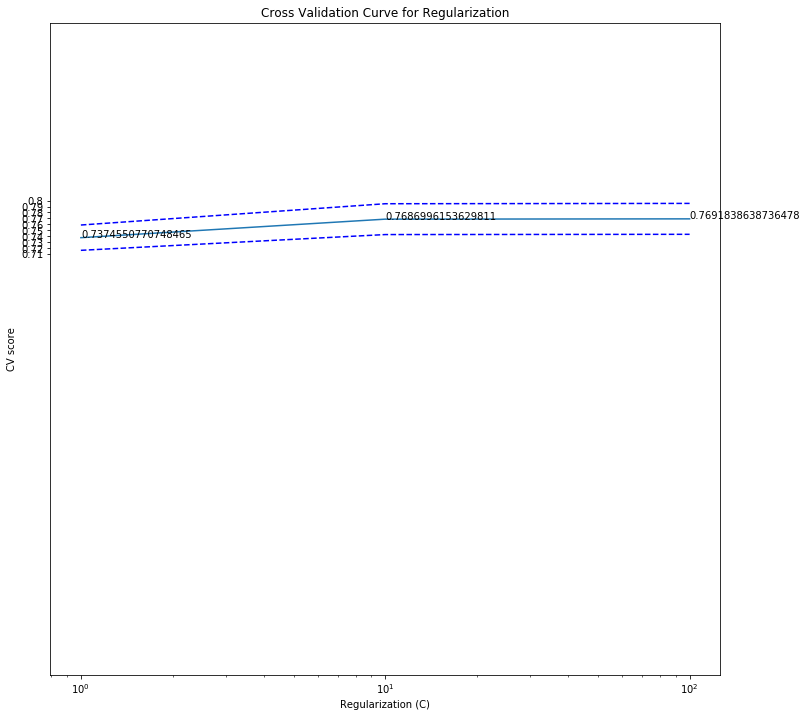

In [9]:
fig = plt.figure(figsize=(CHART_WIDTH, CHART_WIDTH))
ax = fig.add_subplot(111)
C_s = [1, 10, 100]
scores = np.load('../data/processed/svm/reg_scores_v3.npy')
scores_std = np.load('../data/processed/svm/reg_scores_std_v3.npy')
print(scores)
plt.title("Cross Validation Curve for Regularization")
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Regularization (C)')
plt.ylim(0, 1.1)
#plt.legend(loc="best")
for i,j in zip(C_s,scores):
    ax.annotate(str(j),xy=(i,j))
plt.savefig('../plots/classifier/svm/Regularization_values_bigger_data_v3.png')

plt.show()

### 4.2. Learning Curve
we see the learning curve of an SVM with RBF kernel. We can see clearly that the training score is still around the maximum and the validation score could be increased with more training samples

In [10]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = SVC(kernel="rbf", gamma=0.004, C=100)
X_train = X_train_preprocessed.reshape((len(X_train_preprocessed)),-1)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train, y_train_final, cv=cv, n_jobs=10,return_times=True, verbose=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

[learning_curve] Training set sizes: [ 3139 10202 17265 24328 31391]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/Users/apanchal/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=10)]: Done  17 out of  50 | elapsed: 133.3min remaining: 258.7min


NameError: name 'train_sizes' is not defined

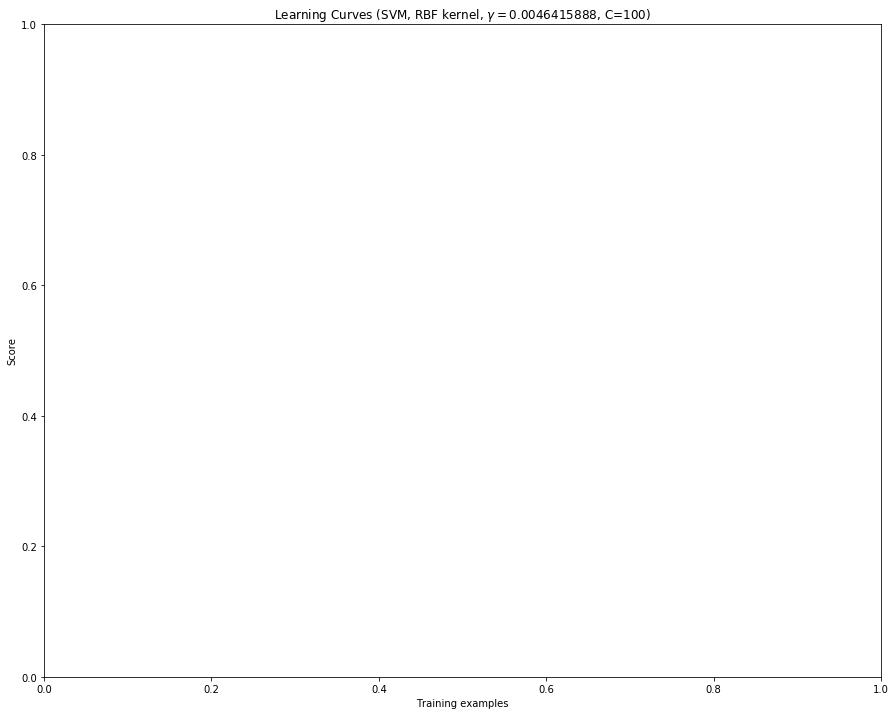

In [11]:
# Plot learning curve
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)

ax.set_title(r"Learning Curves (SVM, RBF kernel, $\gamma=0.0046415888$, C=100)")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")

ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
ax.legend(loc="best")
plt.savefig('test1.png')
plt.show()

In [12]:
best_svm_classifier = SVC(kernel='rbf', gamma=0.0046415888, C=100,probability=True)
best_svm_classifier.fit(X_train, y_train_final)
best_svm_classifier

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0046415888, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
#Save Model
model_name = 'best_01.svm'
LoadSave().saveclassifier(model=best_svm_classifier, filename=model_name)

### 4.3. Testing SVM using Test dataset

In [48]:
X_test_pp = X_test_preprocessed.reshape((len(X_test_preprocessed)),-1)
y_pred = best_svm_classifier.predict(X_test_pp)
acc = accuracy_score(y_test,y_pred)
print("Test accuracy:",acc)

Test accuracy: 0.8197149643705464


### 4.4. Confusion Metric

In [49]:
m = multilabel_confusion_matrix(y_test, y_pred)
#print(type(m))
#print(m.shape, m.ndim)
print(m[0])
print("Classification report for classifier %s:\n%s\n"
      % (best_svm_classifier, metrics.classification_report(y_test, y_pred)))

[[12567     3]
 [   50    10]]
Classification report for classifier SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0046415888, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.77      0.17      0.27        60
           1       0.76      0.89      0.82       720
           2       0.75      0.90      0.82       750
           3       0.75      0.83      0.79       450
           4       0.77      0.80      0.78       660
           5       0.77      0.69      0.73       630
           6       0.72      0.51      0.60       150
           7       0.77      0.78      0.77       450
           8       0.88      0.82      0.85       450
           9       0.96      0.96      0.96       480
          10       0.93      0.93      0.93       660
          11       0.80     

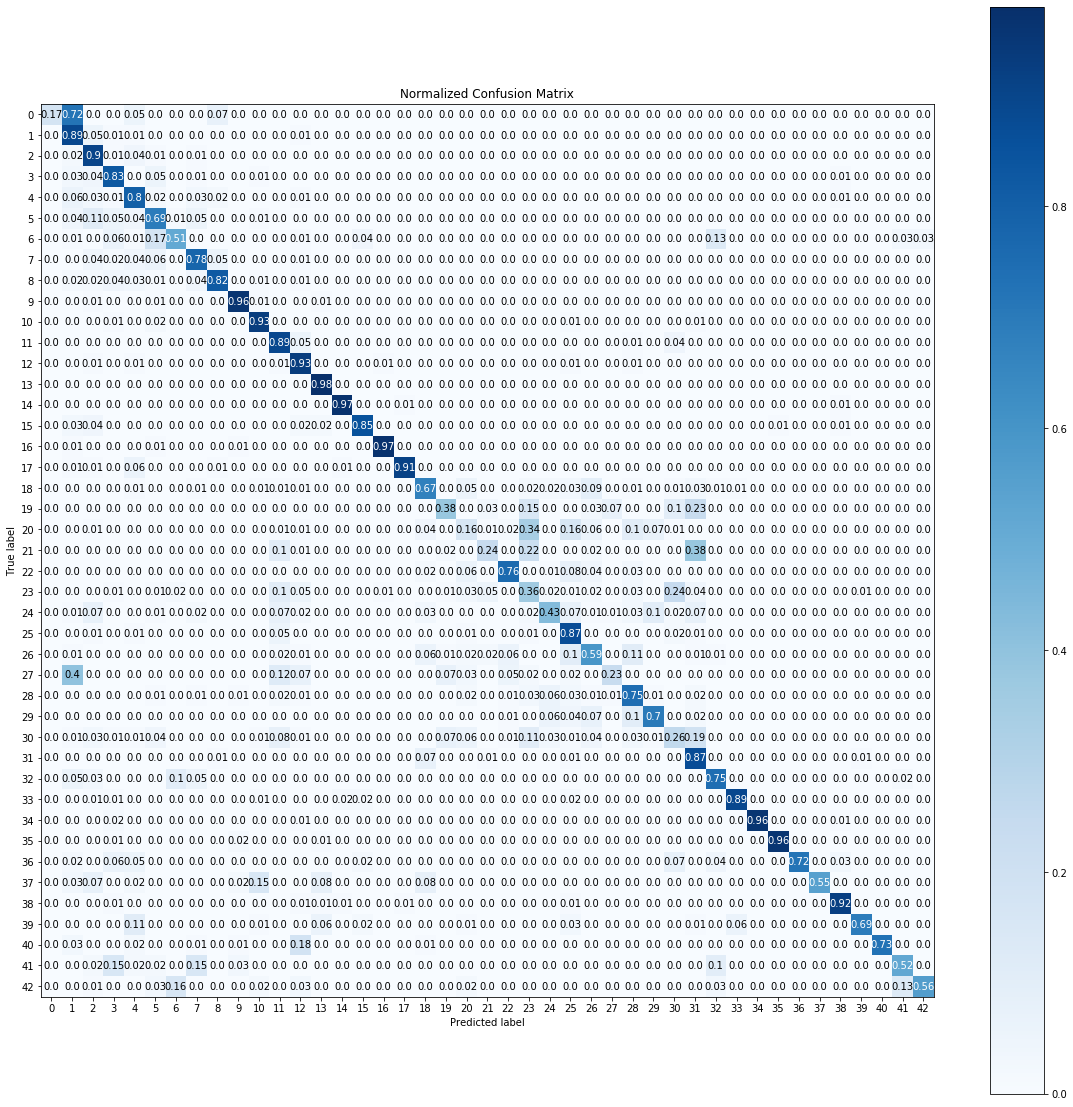

In [28]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred,figsize=(20,20), normalize=True)

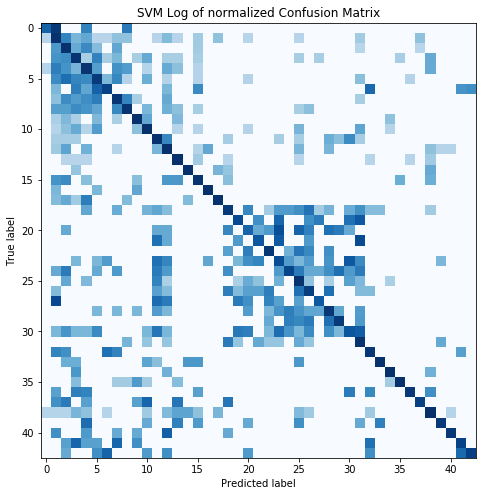

In [32]:
cm = confusion_matrix(y_test,y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = np.log(.0001 + cm)
plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('SVM Log of normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('../plots/classifier/svm/log_confusion_mat.png')
plt.show()

### 4.5. Testing SVM Model on New Images.

In [38]:
### Loading and resizing new test images
new_test_images = []
path = '../data/traffic_sign_images/'
for image in sorted(os.listdir(path)):
    #print('Reading:', path+image)
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_test_images.append(img)
new_IDs = [13, 3, 14, 27, 17, 1,  14, 30, 25, 29, 11, 8,  31, 31, 30, 4, 1, 2, 27, 18]
#print("Number of new testing examples: ", len(new_test_images), 'Signs:', len(new_IDs))

In [39]:
# New test data preprocessing
new_test_images_preprocessed = preprocess(np.asarray(new_test_images))
new_test_images_dataset = new_test_images_preprocessed.reshape(len(new_test_images_preprocessed),-1)

In [42]:
validation_labels = best_svm_classifier.predict(new_test_images_dataset)
predict_probas = best_svm_classifier.predict_proba(new_test_images_dataset)
sorted_probs = np.argsort(predict_probas)
top_k = len(best_svm_classifier.classes_) - 5

New Images Test Accuracy = 30.0%


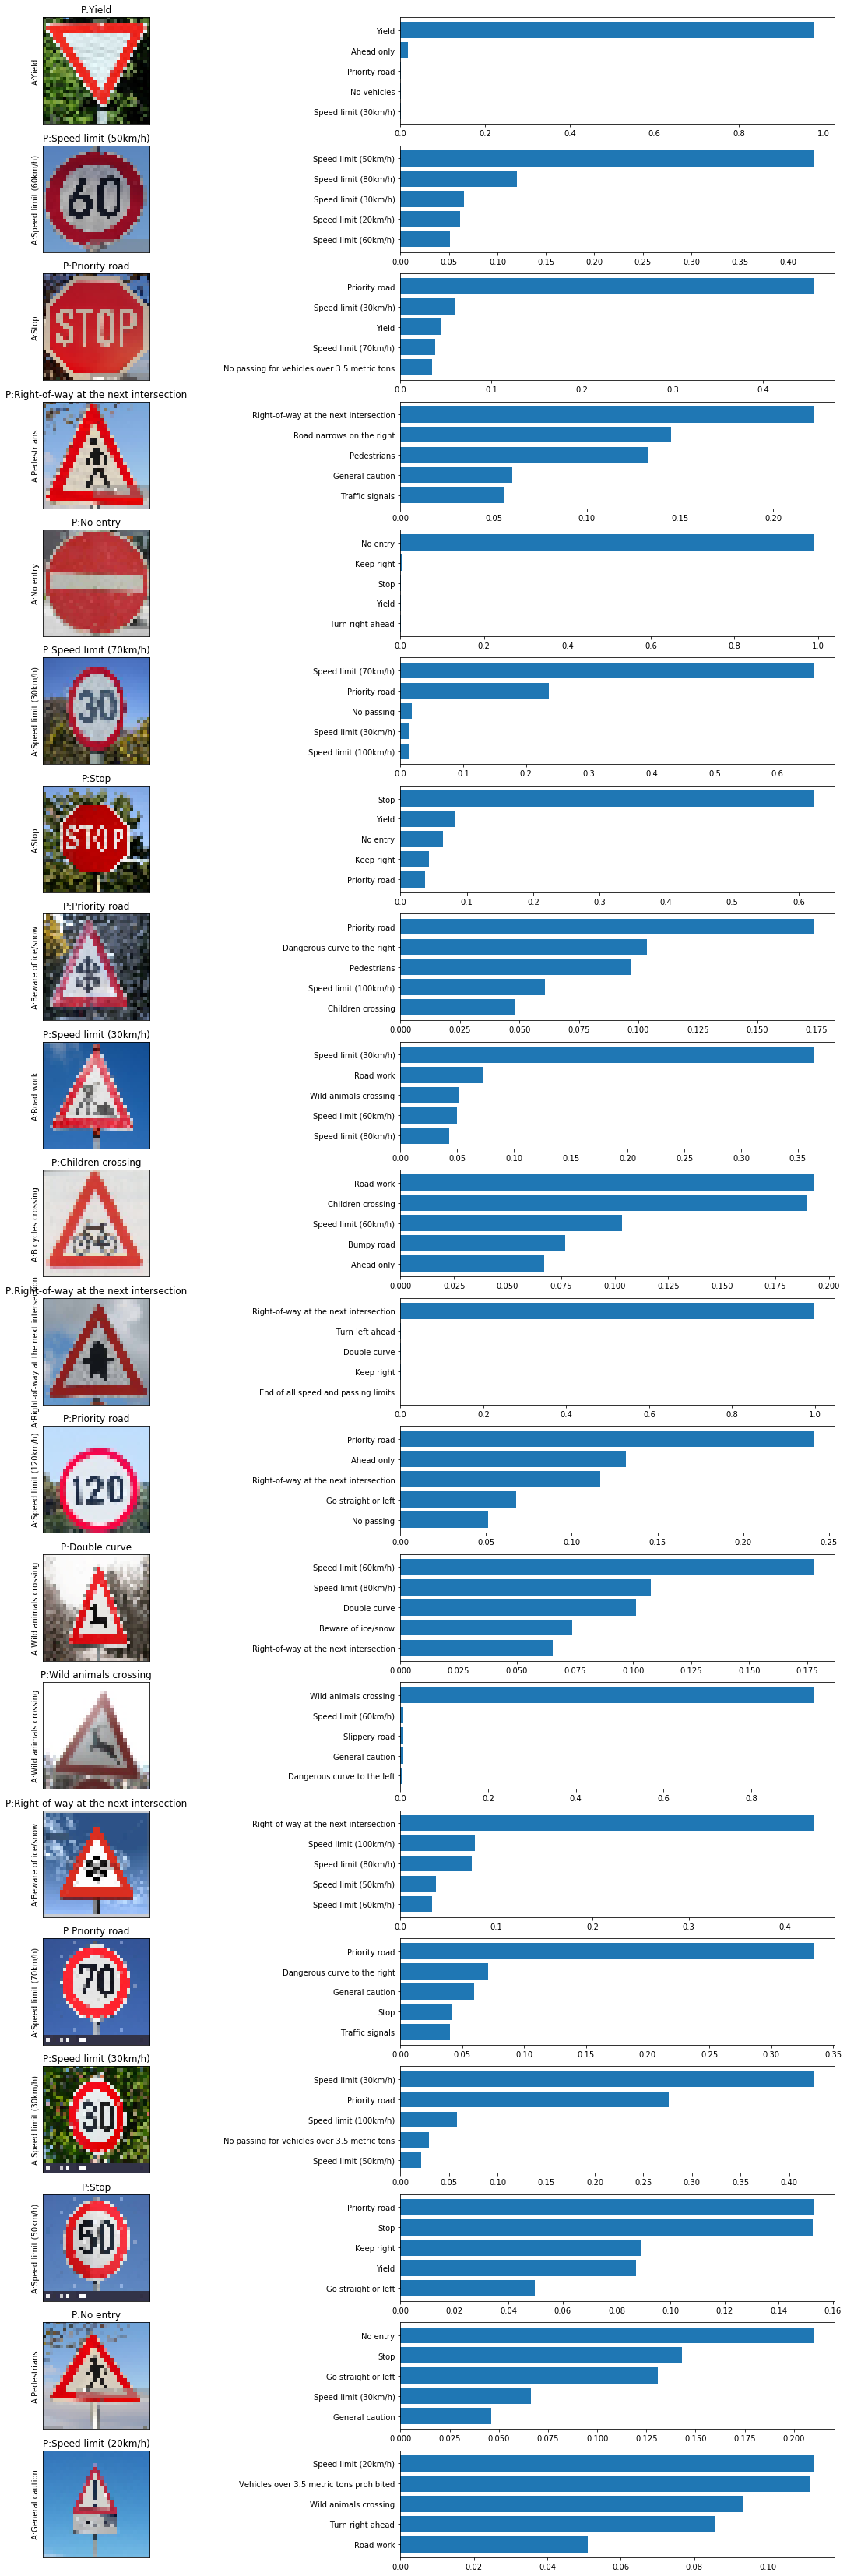

In [47]:
new_test_images_len=len(new_test_images_preprocessed)
plt.figure(figsize=(22, 60))
plt.title("SVM RESULTS")
test_accuracy = 0
for i in range(new_test_images_len):
    
    plt.subplot(new_test_images_len, 2, 2*i+1)
    plt.imshow(new_test_images[i]) 
    actual = signs[new_IDs[i]]
    plt.title('P:'+signs[validation_labels[i]])
    plt.ylabel('A:'+actual)
    accu = new_IDs[i] == validation_labels[i]
    #print('new_IDs[i]->',new_IDs[i], 'validation_labels[i]->',validation_labels[i] )
    if accu == True:
        test_accuracy +=1
    plt.xticks([])
    plt.yticks([])
    
    
    high_probs = sorted_probs[i:(i+1),top_k:].flatten()
    labels = [signs[int(j)] for j in high_probs]
    temp =[predict_probas[i:(i+1),y] for y in high_probs]
    y_prob = np.array(temp).flatten()
    
    plt.subplot(new_test_images_len, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), y_prob)
    plt.yticks(np.arange(1, 6, 1), labels)


print("New Images Test Accuracy = {:.1f}%".format((test_accuracy/new_test_images_preprocessed.shape[0])*100))
plt.savefig('../plots/classifier/svm/svm_new Image_acc.png')